In [ ]:
# Importacion de las librerias necesarias
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# Obtencion del df proporcionado por keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape[0],x_test.shape[0]

(60000, 10000)

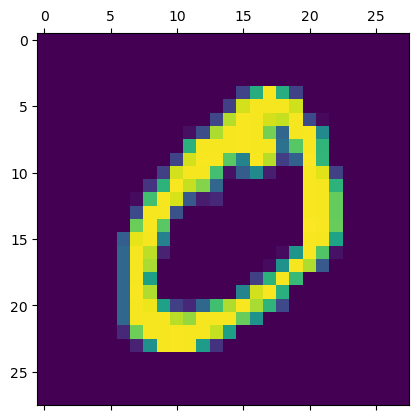

In [ ]:
# Visualizacion de un ejemplo de los datos de entrenamiento
plt.matshow(x_train[1])


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
print(x_train.shape)
# Vectorizacion de los datos de entrenamiento
x_train_flattened = x_train.reshape(len(x_train),28*28)
print(x_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


Debido a que la informacion obtenida en el df es una imagen de `28x28` pixeles, es necesario procesarla de tal manera que la informacion quede distribuida en un array de de dos dimensiones.  
Para llevar a cabo esto se utiliza el metodo `.rashape()`  
**Columnas** dadas por el total de pixeles = 28*28 = 784  
**Filas** = total de observaciones = 60000  

In [ ]:
# Mismo procedimiento para los datos de prueba
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

# Entrenamiento de un modelo sin layers ocultas

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

## Activadores
### Regresion
* relu: Capas ocultas  
* softplus: Capas ocultas
* softsign: Capas ocultas
* tanh: Capas ocultas y de salida (rango -1,1)
* selu: Capas ocultas
* elu: Capas ocultas
* exponential: Capas de salida (rango mayor a 1)
* swish: Capas ocultas
### Clasificacion
* relu: Capas ocultas
* sigmoid: Capas de salida en clasificacion binaria
* softmax: Capa de salida en clasificacion multiclase
* softplus: Capas ocultas
* softsign: Capas ocultas
* tanh: Capas ocultas
* selu: Capas ocultas
* elu: Capas ocultas
* swish: Capas ocultas


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Optimizadores
* SGD
* RMSprop
* Adam
* AdamW
* Adadelta
* Adagrad
* Adamax
* Adafactor
* Nadam
* Ftrl

## Funciones de perdida
**Probabilistic losses**
* BinaryCrossentropy class
* CategoricalCrossentropy class
* SparseCategoricalCrossentropy class
* Poisson class
* binary_crossentropy function
* categorical_crossentropy function
* sparse_categorical_crossentropy function
* poisson function
* KLDivergence class
* kl_divergence function  

**Regression losses**
* MeanSquaredError class
* MeanAbsoluteError class
* MeanAbsolutePercentageError class
* MeanSquaredLogarithmicError class
* CosineSimilarity class
* mean_squared_error function
* mean_absolute_error function
* mean_absolute_percentage_error function
* mean_squared_logarithmic_error function
* cosine_similarity function
* Huber class
* huber function
* LogCosh class
* log_cosh function

## Metricas
**Accuracy metrics**
* Accuracy class
* BinaryAccuracy class
* CategoricalAccuracy class
* SparseCategoricalAccuracy class
* TopKCategoricalAccuracy class
* SparseTopKCategoricalAccuracy class

**Probabilistic metrics**
* BinaryCrossentropy class
* CategoricalCrossentropy class
* SparseCategoricalCrossentropy class
* KLDivergence class
* Poisson class
* Regression metrics
* MeanSquaredError class
* RootMeanSquaredError class
* MeanAbsoluteError class
* MeanAbsolutePercentageError class
* MeanSquaredLogarithmicError class
* CosineSimilarity class
* LogCoshError class  

**Classification metrics based on True/False positives & negatives**
* AUC class
* Precision class
* Recall class
* TruePositives class
* TrueNegatives class
* FalsePositives class
* FalseNegatives class
* PrecisionAtRecall class
* SensitivityAtSpecificity class
* SpecificityAtSensitivity class  

**Image segmentation metrics**
* MeanIoU class  

**Hinge metrics for "maximum-margin" classification**
* Hinge class
* SquaredHinge class
* CategoricalHinge class


In [ ]:
model.fit(x_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4708 - accuracy: 0.8756
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.9206
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9280
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2558 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9293
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

### Evaluar el modelo con tensorflow

In [ ]:
# El metodo .evaluate retorna la perdida y la metrica utilizada [loss,accuracy]
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2657 - accuracy: 0.9268


[0.26569581031799316, 0.926800012588501]

### Matriz de confusion

In [ ]:
y_pred = model.predict(x_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 0s 1ms/step


Text(50.722222222222214, 0.5, 'Truth')

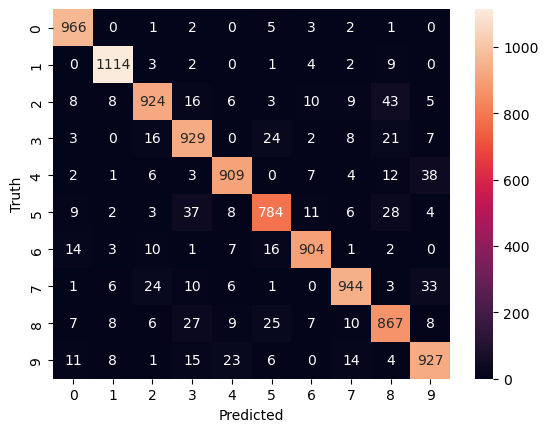

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Con layers ocultas

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='swish'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2879 - accuracy: 0.9168
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1296 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0646 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0486 - accuracy: 0.9849


In [ ]:

model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9778


[0.0737038180232048, 0.9778000116348267]

313/313 [==============================] - 1s 1ms/step


Text(50.722222222222214, 0.5, 'Truth')

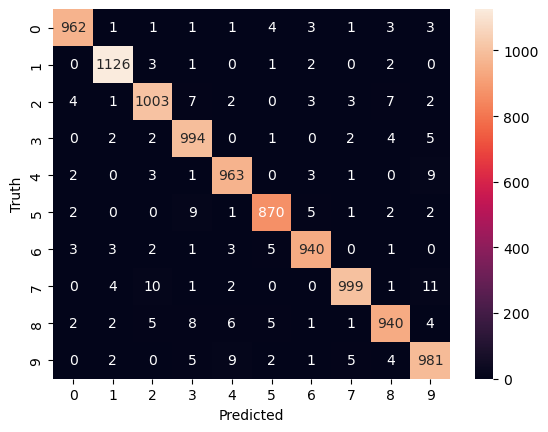

In [ ]:
y_pred = model.predict(x_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')